This code implements the training and evaluation of a neural network for image classification using the CIFAR-10 dataset. Starting with the utilization of a pre-trained VGG16 model for feature extraction, the code involves building and training a model with added fully connected layers, evaluating its performance on test data, and unfreezing the top layers of VGG16 for further training. It then includes the construction of a modified model with some unfrozen top layers, training this model, and evaluating its effectiveness. The code also involves saving the trained model and visualizing training results using plots.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import cifar10
from keras.preprocessing.image import img_to_array, array_to_img

from sklearn.metrics import classification_report

In [17]:
# Verify the version
print('Packages version: \n')
print(tf.__name__, tf.__version__)
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)

Packages version: 

tensorflow 2.15.0
numpy 1.25.2
pandas 1.5.3


In [2]:
# Presettings

num_classes = 10
filepath = "weights.h5"
batch_size = 128
epochs = 150

In [3]:
# Loading the dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [20]:
# Shape cheecing

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
# Defining array. Each item of array represent integer value of labels. 10 item for 10 integer label
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [22]:
# Resize the images 64*64 as required by VGG16
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((64,64))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((64,64))) for im in x_test])
print('Resize the images 64*64:', x_train.shape, x_test.shape)


Resize the images 64*64: (50000, 64, 64, 3) (10000, 64, 64, 3)


In [23]:
# Normalization of data and transformation of labels into categorical ones. Pixel value of the image falls between 0 to 255

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

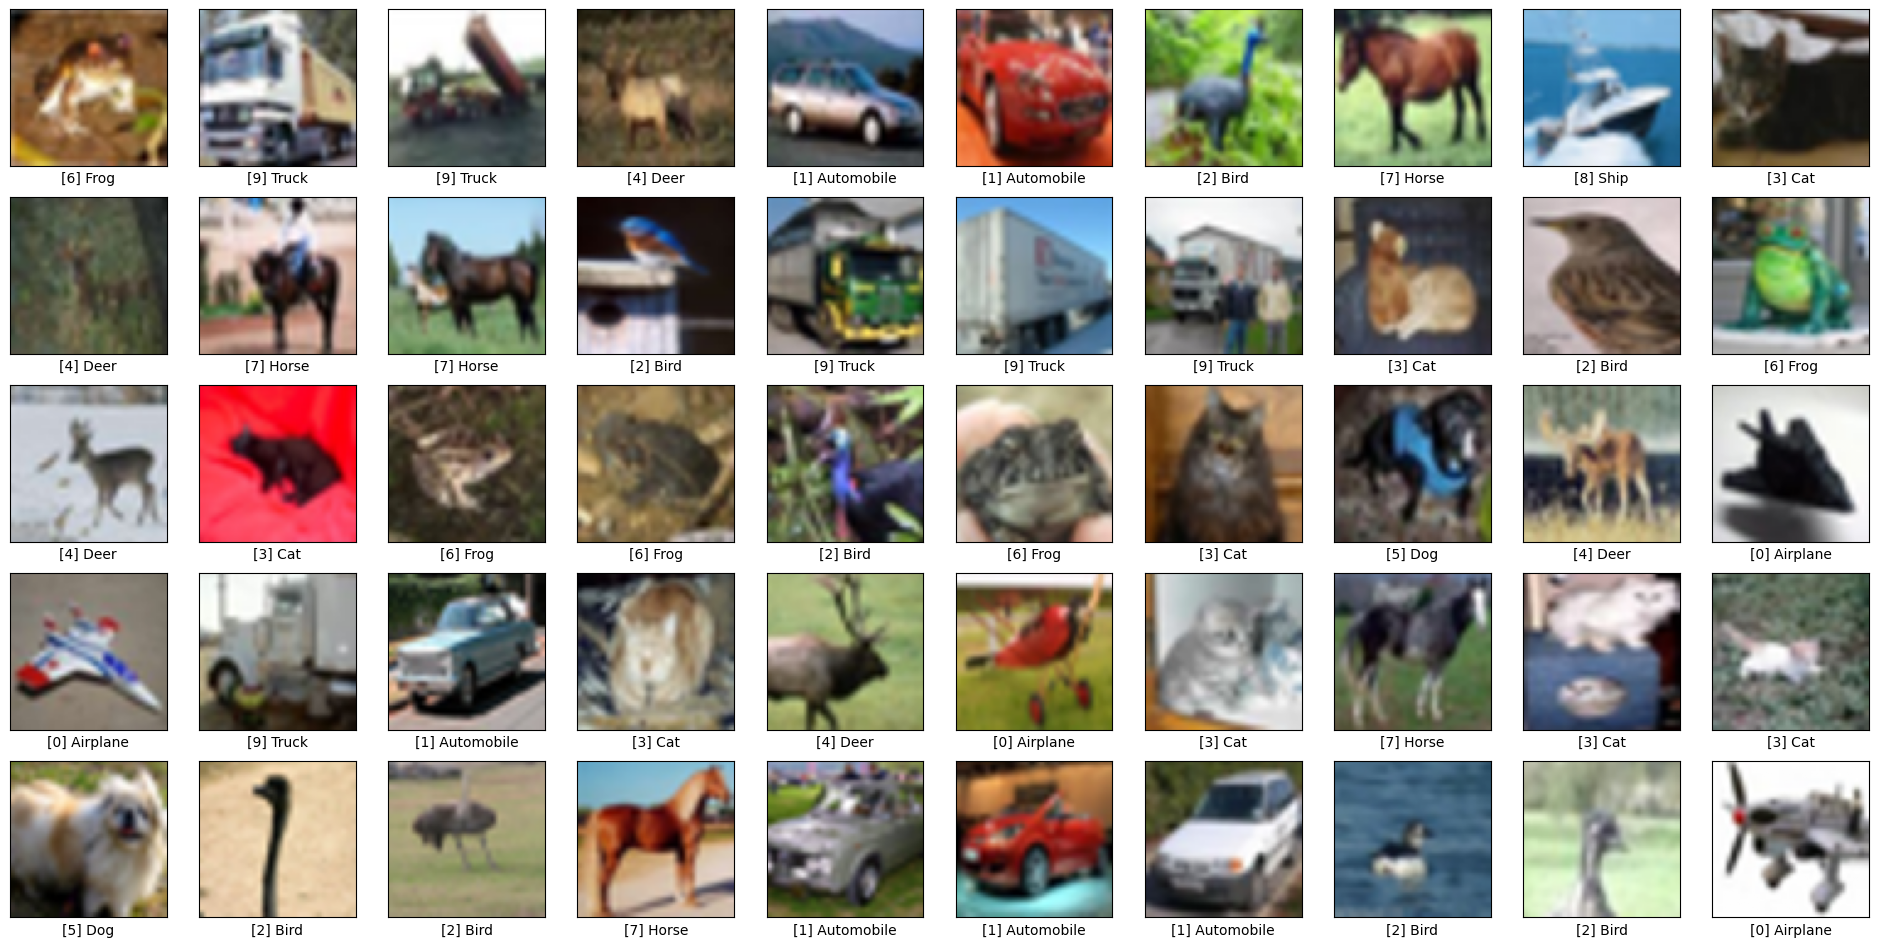

In [24]:
# Display the first 25 images from traing set
plt.figure(figsize=(24, 24))
for i in range(50):
  plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(f'{y_train[i]} {class_names[y_train[i][0]]}')
plt.show()

In [25]:
# One hot encoding of the labels

y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)

In [26]:
# Define the Convolutional Neural Network

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))



In [27]:
# Model creation
model = Sequential()
model.add(conv_base)  # Додавання попередньо навченої моделі

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

conv_base.trainable = False

In [28]:
# Summary model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

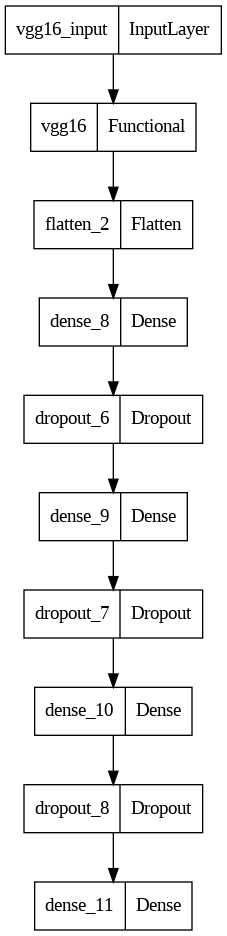

In [29]:
# Plot model graph
plot_model(model, 'model.png')

In [30]:
# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

In [31]:
# Training model
es_cb = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, start_from_epoch=7, restore_best_weights=True)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks=[es_cb])


Epoch 1/150
391/391 [==============================] - 25s 60ms/step - loss: 1.7002 - accuracy: 0.3938 - val_loss: 1.1496 - val_accuracy: 0.6154
Epoch 2/150
391/391 [==============================] - 21s 54ms/step - loss: 1.2536 - accuracy: 0.5746 - val_loss: 1.0035 - val_accuracy: 0.6703
Epoch 3/150
391/391 [==============================] - 20s 52ms/step - loss: 1.1353 - accuracy: 0.6245 - val_loss: 0.9635 - val_accuracy: 0.6729
Epoch 4/150
391/391 [==============================] - 20s 52ms/step - loss: 1.0619 - accuracy: 0.6486 - val_loss: 0.9215 - val_accuracy: 0.6877
Epoch 5/150
391/391 [==============================] - 21s 54ms/step - loss: 1.0103 - accuracy: 0.6647 - val_loss: 0.8964 - val_accuracy: 0.6996
Epoch 6/150
391/391 [==============================] - 21s 54ms/step - loss: 0.9699 - accuracy: 0.6789 - val_loss: 0.8939 - val_accuracy: 0.6973
Epoch 7/150
391/391 [==============================] - 21s 53ms/step - loss: 0.9389 - accuracy: 0.6905 - val_loss: 0.8609 - val_ac

In [32]:
# Unfreeze all layers of the previously trained VGG16 model
es_cb = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, start_from_epoch=7, restore_best_weights=True)
conv_base.trainable = True

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Retraining the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks=[es_cb])


Epoch 1/150
391/391 [==============================] - 66s 157ms/step - loss: 1.0304 - accuracy: 0.6742 - val_loss: 0.6270 - val_accuracy: 0.7936
Epoch 2/150
391/391 [==============================] - 59s 152ms/step - loss: 0.5069 - accuracy: 0.8412 - val_loss: 0.4320 - val_accuracy: 0.8581
Epoch 3/150
391/391 [==============================] - 59s 151ms/step - loss: 0.3751 - accuracy: 0.8847 - val_loss: 0.3645 - val_accuracy: 0.8784
Epoch 4/150
391/391 [==============================] - 59s 152ms/step - loss: 0.2727 - accuracy: 0.9142 - val_loss: 0.3468 - val_accuracy: 0.8896
Epoch 5/150
391/391 [==============================] - 59s 151ms/step - loss: 0.2291 - accuracy: 0.9296 - val_loss: 0.3540 - val_accuracy: 0.8938
Epoch 6/150
391/391 [==============================] - 59s 151ms/step - loss: 0.1817 - accuracy: 0.9442 - val_loss: 0.3794 - val_accuracy: 0.8867
Epoch 7/150
391/391 [==============================] - 59s 151ms/step - loss: 0.1439 - accuracy: 0.9551 - val_loss: 0.3224 -

In [33]:
# Evaluation of the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


313/313 [==============================] - 6s 15ms/step - loss: 0.3541 - accuracy: 0.9247
Test Accuracy: 92.47%


In [34]:
# Obtaining model predictions on test data
y_pred = model.predict(x_test)

# Classification report
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(report)

313/313 [==============================] - 5s 14ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1000
           1       0.97      0.96      0.96      1000
           2       0.90      0.91      0.91      1000
           3       0.83      0.85      0.84      1000
           4       0.92      0.90      0.91      1000
           5       0.90      0.85      0.87      1000
           6       0.95      0.95      0.95      1000
           7       0.95      0.96      0.95      1000
           8       0.94      0.96      0.95      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



The model retraining process, conceptualized by Andrew Chychur, involves:

*  Unfreezing Layers: Selected layers of the pre-trained VGG16 model are unfrozen.
*   Creating a Modified Model: A new model is constructed by adding additional layers on top of the unfrozen VGG16 base.
*  Compiling the Model: The modified model is compiled with appropriate optimizer, loss function, and metrics.
*  Training the Model: The modified model is trained on the CIFAR-10 dataset.
*  Evaluation: The model's performance is evaluated on the test dataset.

This process fine-tunes the pre-trained VGG16 model on CIFAR-10, aiming to enhance its performance for the specific task.


In [36]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

conv_base.trainable = True


layer_list = ["block4_conv1", "block5_conv1"]
for layer in conv_base.layers:
    if layer.name in layer_list:
        set_trainable = True
    else:
        layer.trainable = False


modified_model = Sequential([
    model,
    # conv_base,
    Flatten(),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax"),
])

# Compile and training model
modified_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [37]:
modified_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10)                15929290  
                                                                 
 flatten_4 (Flatten)         (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 256)               2816      
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 15934676 (60.79 MB)
Trainable params: 15934676 (60.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
es_cb = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, restore_best_weights=True)

# Retraining the model
history = modified_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            #   validation_data=(x_test, y_test),
                            validation_split=0.2,
                            callbacks=[es_cb])

# history = modified_model.fit(
#     x_train, y_train, epochs=50, verbose=1, batch_size=128, validation_split=0.2
# )


Epoch 1/150
313/313 [==============================] - 59s 175ms/step - loss: 1.9918 - accuracy: 0.6205 - val_loss: 1.7286 - val_accuracy: 0.6543
Epoch 2/150
313/313 [==============================] - 47s 151ms/step - loss: 1.5043 - accuracy: 0.6202 - val_loss: 1.2611 - val_accuracy: 0.6305
Epoch 3/150
313/313 [==============================] - 48s 152ms/step - loss: 1.1225 - accuracy: 0.6236 - val_loss: 0.9376 - val_accuracy: 0.6434
Epoch 4/150
313/313 [==============================] - 48s 152ms/step - loss: 0.8355 - accuracy: 0.6546 - val_loss: 0.7139 - val_accuracy: 0.6691
Epoch 5/150
313/313 [==============================] - 48s 152ms/step - loss: 0.6538 - accuracy: 0.6773 - val_loss: 0.6346 - val_accuracy: 0.6742
Epoch 6/150
313/313 [==============================] - 48s 152ms/step - loss: 0.5602 - accuracy: 0.6883 - val_loss: 0.5593 - val_accuracy: 0.6972
Epoch 7/150
313/313 [==============================] - 48s 152ms/step - loss: 0.5143 - accuracy: 0.6963 - val_loss: 0.5815 -

In [39]:
# Evaluation of the model on test data
loss, accuracy = modified_model.evaluate(x_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

313/313 [==============================] - 5s 15ms/step - loss: 0.3648 - accuracy: 0.9210
Test Accuracy: 92.10%


In [40]:
# Отримання передбачень моделі на тестових даних
y_pred_m = modified_model.predict(x_test)
# Отримання класифікаційного звіту
report = classification_report(y_test.argmax(axis=1), y_pred_m.argmax(axis=1))
print(report)

313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1000
           1       0.96      0.96      0.96      1000
           2       0.90      0.89      0.89      1000
           3       0.86      0.83      0.84      1000
           4       0.90      0.93      0.91      1000
           5       0.90      0.85      0.88      1000
           6       0.94      0.95      0.95      1000
           7       0.92      0.96      0.94      1000
           8       0.96      0.95      0.95      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [41]:
# Save model
model.save("weights-cifar10.h5")
model.save('my_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
y_hat = model.predict(x_test)


313/313 [==============================] - 5s 15ms/step


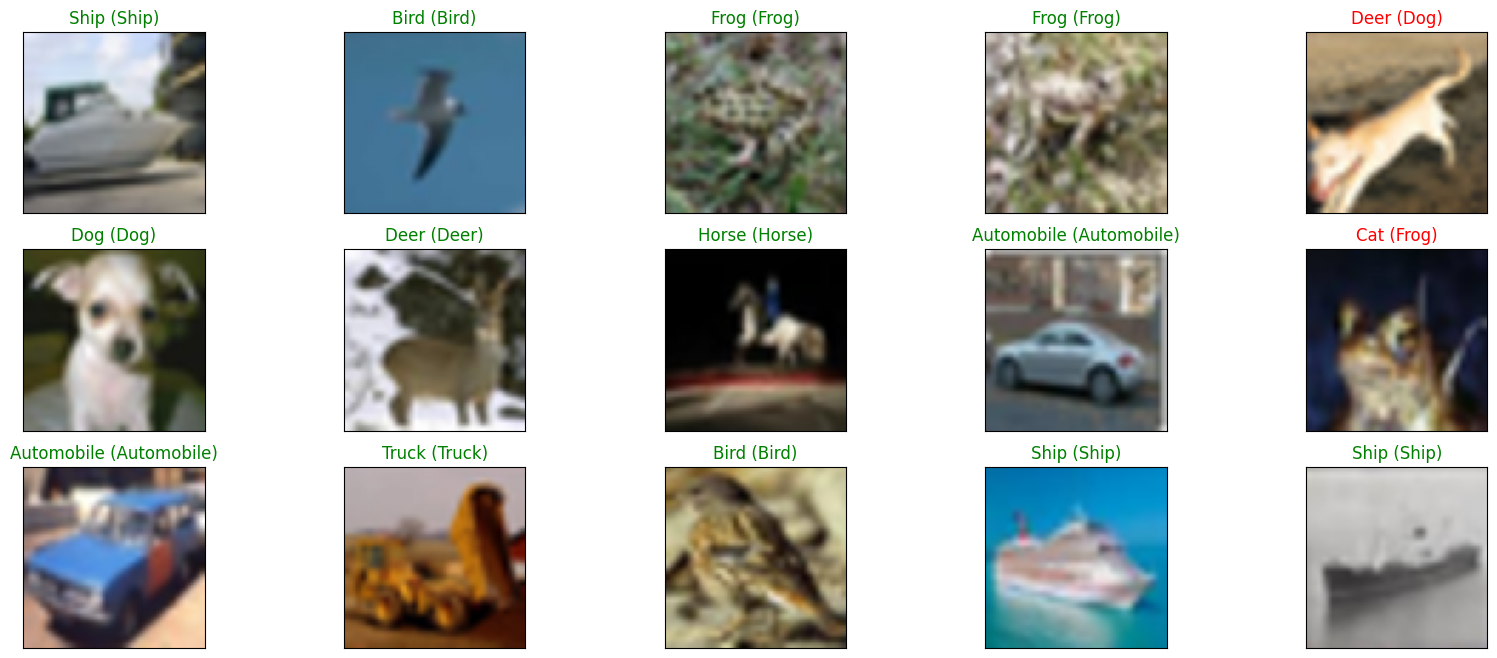

In [44]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])

    true_index = np.argmax(y_test[index].astype(int))
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

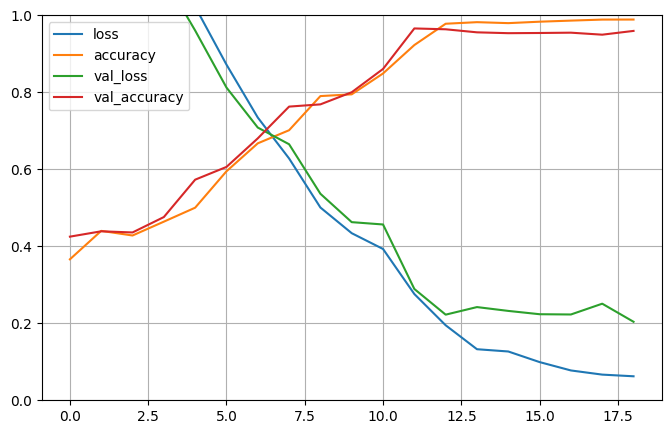

In [ ]:
# Plot results
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Show results
results = modified_model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 3s 8ms/step - loss: 0.7605 - accuracy: 0.8550
[0.7604752779006958, 0.8550000190734863]


### Модель с VGG16 и 3-мя дополнительными слоями.
Картинки смаштабированы до 64*64 пикселя.  
Полное переобучение модели маленьким learning_rate.

In [5]:
# Loading the dataset
Cifar10 = keras.datasets.cifar10

(X_train2, y_train2), (X_test2, y_test2) = Cifar10.load_data()

In [6]:
from keras.preprocessing.image import img_to_array, array_to_img

# Resize the images 64*64 as required by VGG16
X_train2 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((64,64))) for im in X_train2])
X_test2 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((64,64))) for im in X_test2])
print('Resize the images 64*64:', X_train2.shape, X_test2.shape)

X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')

X_train2 = X_train2 / 255.0
X_test2 = X_test2 / 255.0

Resize the images 64*64: (50000, 64, 64, 3) (10000, 64, 64, 3)


In [7]:
# One hot encoding of the labels
num_classes = 10
y_train2=to_categorical(y_train2, num_classes)
y_test2=to_categorical(y_test2, num_classes)

In [8]:
conv_base2 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

conv_base2.trainable = True


# layer_list = ["block4_conv1", "block5_conv1"]
# for layer in conv_base2.layers:
#     if layer.name in layer_list:
#         layer.trainable = True
#     else:
#         layer.trainable = False


model2 = Sequential([
    conv_base2,
    Flatten(),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax"),
])

# Compile and training model
model2.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [9]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 15897674 (60.64 MB)
Trainable params: 15897674 (60.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
es_cb = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, restore_best_weights=True)

# Retraining the model
history2 = model2.fit(X_train2, y_train2,
                        batch_size=batch_size,
                        epochs=epochs,
                        #   validation_data=(x_test, y_test),
                        validation_split=0.2,
                        callbacks=[es_cb])


Epoch 1/150
313/313 [==============================] - 66s 163ms/step - loss: 0.7667 - accuracy: 0.7314 - val_loss: 0.4364 - val_accuracy: 0.8443
Epoch 2/150
313/313 [==============================] - 48s 153ms/step - loss: 0.3414 - accuracy: 0.8817 - val_loss: 0.3653 - val_accuracy: 0.8729
Epoch 3/150
313/313 [==============================] - 50s 158ms/step - loss: 0.2167 - accuracy: 0.9250 - val_loss: 0.3028 - val_accuracy: 0.8994
Epoch 4/150
313/313 [==============================] - 49s 156ms/step - loss: 0.1338 - accuracy: 0.9526 - val_loss: 0.3096 - val_accuracy: 0.9022
Epoch 5/150
313/313 [==============================] - 49s 158ms/step - loss: 0.1001 - accuracy: 0.9647 - val_loss: 0.3839 - val_accuracy: 0.8880
Epoch 6/150
313/313 [==============================] - 49s 157ms/step - loss: 0.0678 - accuracy: 0.9753 - val_loss: 0.3855 - val_accuracy: 0.8950
Epoch 7/150
313/313 [==============================] - 49s 158ms/step - loss: 0.0599 - accuracy: 0.9792 - val_loss: 0.3421 -

In [11]:
# Evaluation of the model on test data
loss, accuracy = model2.evaluate(X_test2, y_test2)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

313/313 [==============================] - 6s 15ms/step - loss: 0.3765 - accuracy: 0.9132
Test Accuracy: 91.32%


In [12]:
# Отримання передбачень моделі на тестових даних
y_pred_2 = model2.predict(X_test2)
# Отримання класифікаційного звіту
report = classification_report(y_test2.argmax(axis=1), y_pred_2.argmax(axis=1))
print(report)

313/313 [==============================] - 5s 14ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.94      0.97      0.95      1000
           2       0.90      0.89      0.90      1000
           3       0.83      0.83      0.83      1000
           4       0.85      0.95      0.90      1000
           5       0.89      0.84      0.87      1000
           6       0.94      0.94      0.94      1000
           7       0.96      0.91      0.93      1000
           8       0.96      0.93      0.94      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [13]:
y_hat2 = model2.predict(X_test2)


313/313 [==============================] - 4s 14ms/step


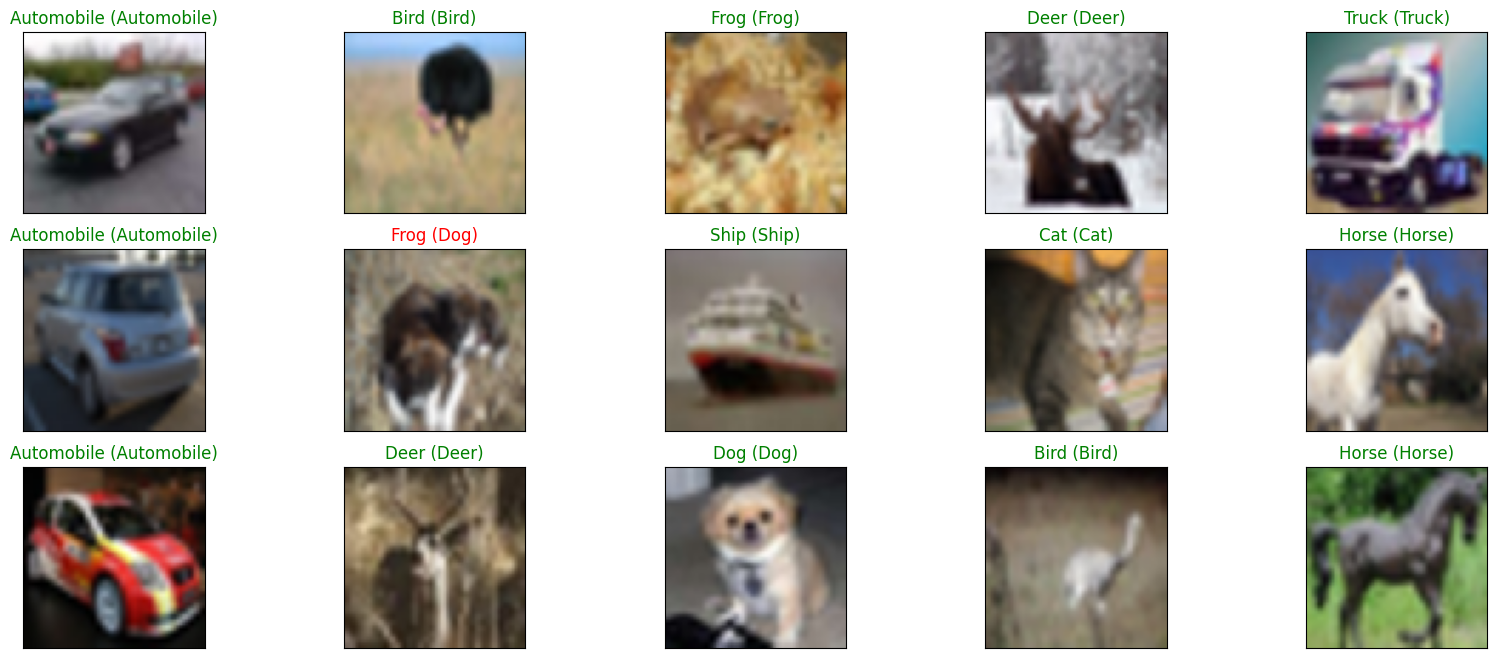

In [21]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test2.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test2[index]))
    predict_index = np.argmax(y_hat2[index])

    true_index = np.argmax(y_test2[index].astype(int))
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [23]:
model2.save("model-cifar10.h5")
model2.save('model-cifar10.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
